# Introduction

Here, we will continue from session-2 and look into clustering and annotating clusters.

# Load packages

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load previously saved data

In [2]:
adata = sc.read_h5ad('../session-02/data/data_from_session_2.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'connectivities', 'distances'

# Clustering

One of the primary applications of scRNA-seq has been in the identification of novel and rare cell types. In contrast to bulk measurements, which obscure the cell-cell heterogeneity, single-cell level analysis offers an unprecedented precision to classify cells into different types.

To think about it computationally: The data presents us with a bunch of objects (individual cells) that have a certain set of features (genes), and we would like to classify the objects into distinct groups or categories each consisting of similar cells. In our case, these distinct groups or categories can be biologically interpreted as cell types. Therefore, in essence the problem of identifying cell types (novel, rare or known) boils down to a problem of clustering.

Numerous algorithms have been put forward to perform clustering on single-cell data. We will discuss Leiden clustering.

In [4]:
sc.tl.leiden(adata, resolution = 1, random_state=0)

/var/folders/x1/3bxg2yyn42x6m5tcv9l5k511m4dgnw/T/ipykernel_75127/310003405.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution = 1, random_state=0)


In [5]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'connectivities', 'distances'

## Visualize on UMAP

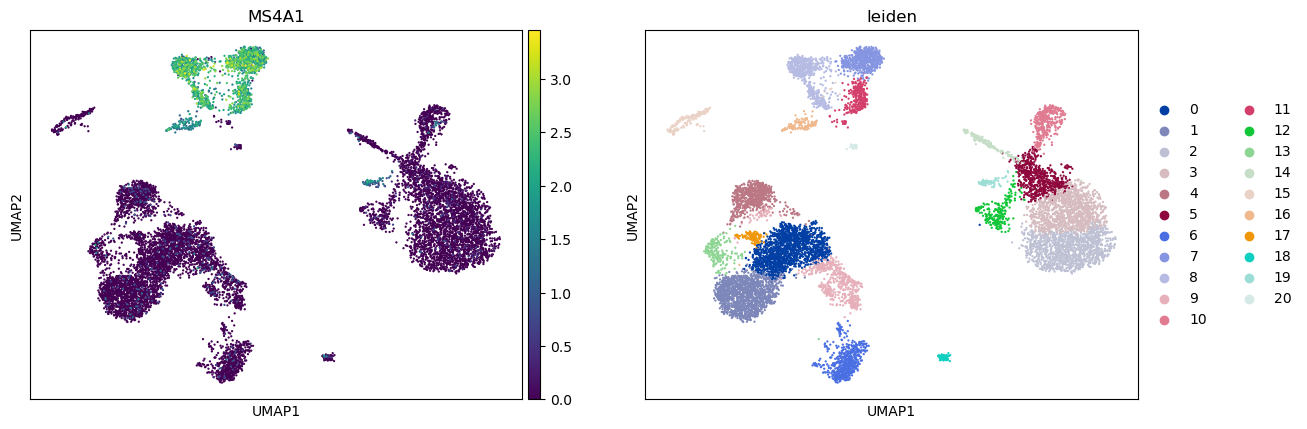

In [7]:
sc.pl.umap(adata, color = ['MS4A1', 'leiden'])

# Differential expression analysis

In [9]:
sc.tl.rank_genes_groups(adata, groupby='leiden', method = 'wilcoxon', key_added='cluster_vs_rest')

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:460: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site

In [10]:
adata

AnnData object with n_obs × n_vars = 11179 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap', 'leiden', 'leiden_colors', 'cluster_vs_rest'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'connectivities', 'distances'

In [11]:
adata.uns['cluster_vs_rest']

{'params': {'groupby': 'leiden',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('IL7R', 'TPT1', 'S100A8', 'CTSS', 'KLRB1', 'CPVL', 'GNLY', 'IGKC', 'CD79A', 'CCL5', 'LST1', 'IGKC', 'S100A9', 'MALAT1', 'HLA-DPB1', 'PF4', 'MS4A1', 'IL32', 'CCDC50', 'MS4A1', 'SOX4'),
            ('LDHB', 'EEF1A1', 'S100A12', 'LGALS2', 'GZMK', 'PSAP', 'NKG7', 'IGHM', 'CD37', 'NKG7', 'FCGR3A', 'CD79A', 'S100A12', 'DDX17', 'HLA-DPA1', 'NRGN', 'CD79A', 'TRAC', 'UGCG', 'CD79A', 'PRSS57'),
            ('TRAC', 'EEF1B2', 'S100A9', 'NEAT1', 'KLRG1', 'NPC2', 'KLRD1', 'IGHD', 'IGLC2', 'IL32', 'SMIM25', 'MS4A1', 'S100A8', 'MT-ATP6', 'CST3', 'PPBP', 'BANK1', 'HLA-A', 'PLD4', 'IGHM', 'CDK6'),
            ...,
            ('HLA-DRB1', 'CYBA', 'EVL', 'EVL', 'FTH1', 'LTB', 'VIM', 'S100A6', 'S100A4', 'HLA-DRA', 'CD99', 'HCST', 'RACK1', 'ACTG1', 'MALAT1', 'EEF1A1', 'S100A6', 'MT-ND1', 'MT-ND3', 'CD3D', 'B2M'),
            ('CD

In [12]:
sc.get.rank_genes_groups_df(adata, key='cluster_vs_rest', group='0')

,names,scores,logfoldchanges,pvals,pvals_adj
0,IL7R,50.102001,3.358644,0.000000e+00,0.000000e+00
1,LDHB,46.675102,2.106210,0.000000e+00,0.000000e+00
2,TRAC,45.313419,2.652903,0.000000e+00,0.000000e+00
3,IL32,44.828285,2.821776,0.000000e+00,0.000000e+00
4,TPT1,44.554985,0.897138,0.000000e+00,0.000000e+00
...,...,...,...,...,...
13608,ZEB2,-34.843117,-5.014536,5.412976e-266,3.508897e-263
13609,HLA-DPA1,-35.068153,-3.670320,2.062318e-269,1.559685e-266
13610,HLA-DRB1,-36.517628,-4.623781,5.823764e-292,5.285260e-289
13611,CD74,-36.605110,-2.753643,2.371746e-293,2.306184e-290


# Utilizing clustering results and DEGs to investigate QC metrics of data

Once we have clusters, we can also look at how the various QC metrics or specific gene expression behave across the clusters. This can help us pinpoint if there are specific cluster of cells that have lower quality score. That way, we can clean our data more appropriately.

## Investigate % mito content, library size, number of genes expressed in each cluster

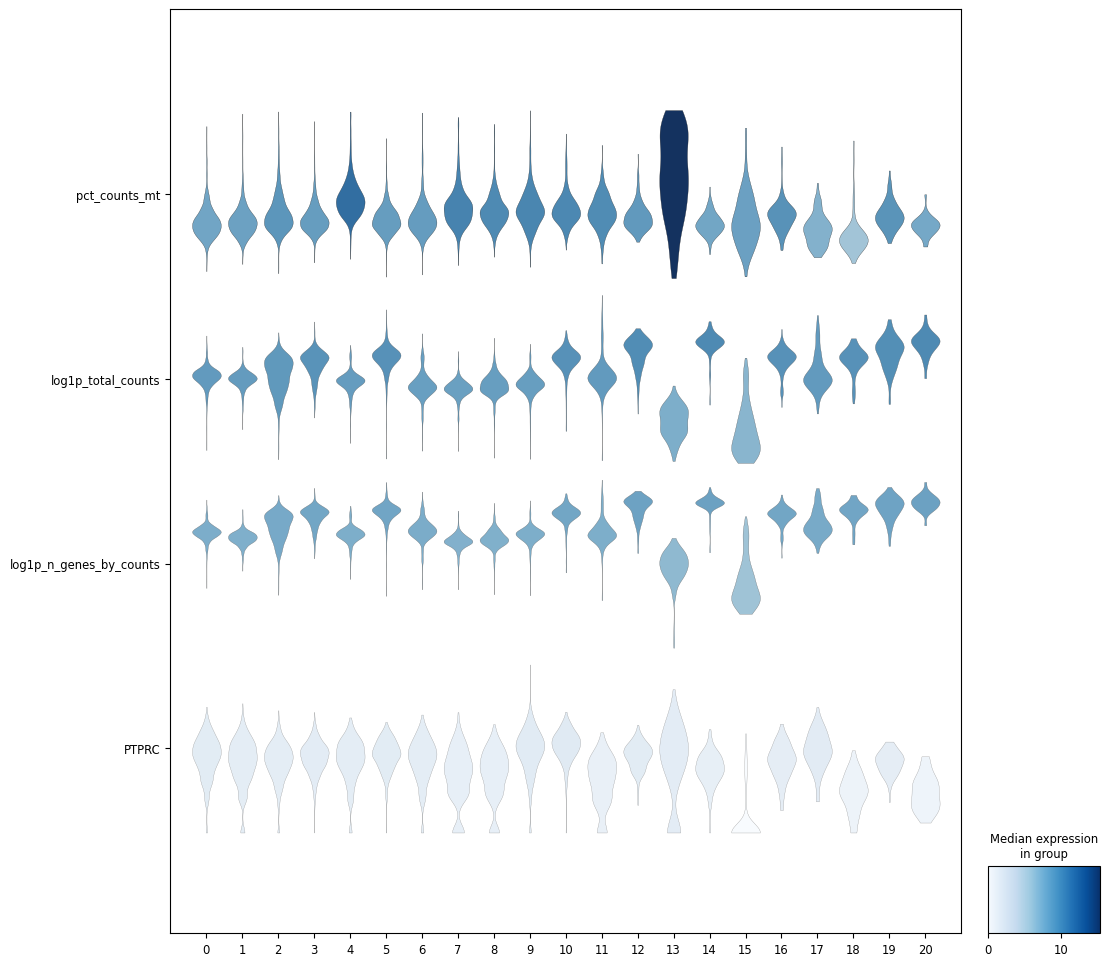

In [13]:
sc.pl.stacked_violin(adata, var_names = ['pct_counts_mt', 'log1p_total_counts', 'log1p_n_genes_by_counts', 'PTPRC'], groupby='leiden', swap_axes=True, 
                     figsize = (12, 12))

## Alternate visual

In [14]:
df_temp = pd.DataFrame({'leiden': adata.obs['leiden'], 
                        '%-Mito': adata.obs['pct_counts_mt'], 
                        'library_size': adata.obs['log1p_total_counts'], 
                        'n_genes_per_cell': adata.obs['log1p_n_genes_by_counts'], 
                        'PTPRC': adata[:, 'PTPRC'].X.toarray().flatten(), 
                        'doublet_score': adata.obs['doublet_score']}, index = adata.obs.index)

In [15]:
df_temp.head()

,leiden,%-Mito,library_size,n_genes_per_cell,PTPRC,doublet_score
AAACCCAAGCGCCCAT-1,0,2.359347,7.698483,6.992096,2.376871,0.071849
AAACCCAAGGTTCCGC-1,14,6.590343,9.908028,8.343078,0.759340,0.019096
AAACCCACAGAGTTGG-1,2,10.757988,8.680162,7.515889,1.716851,0.001666
AAACCCACAGGTATGG-1,6,7.848101,8.618124,7.703910,1.046680,0.006674
AAACCCACATAGTCAC-1,8,10.830396,8.538367,7.387709,1.833295,0.017654


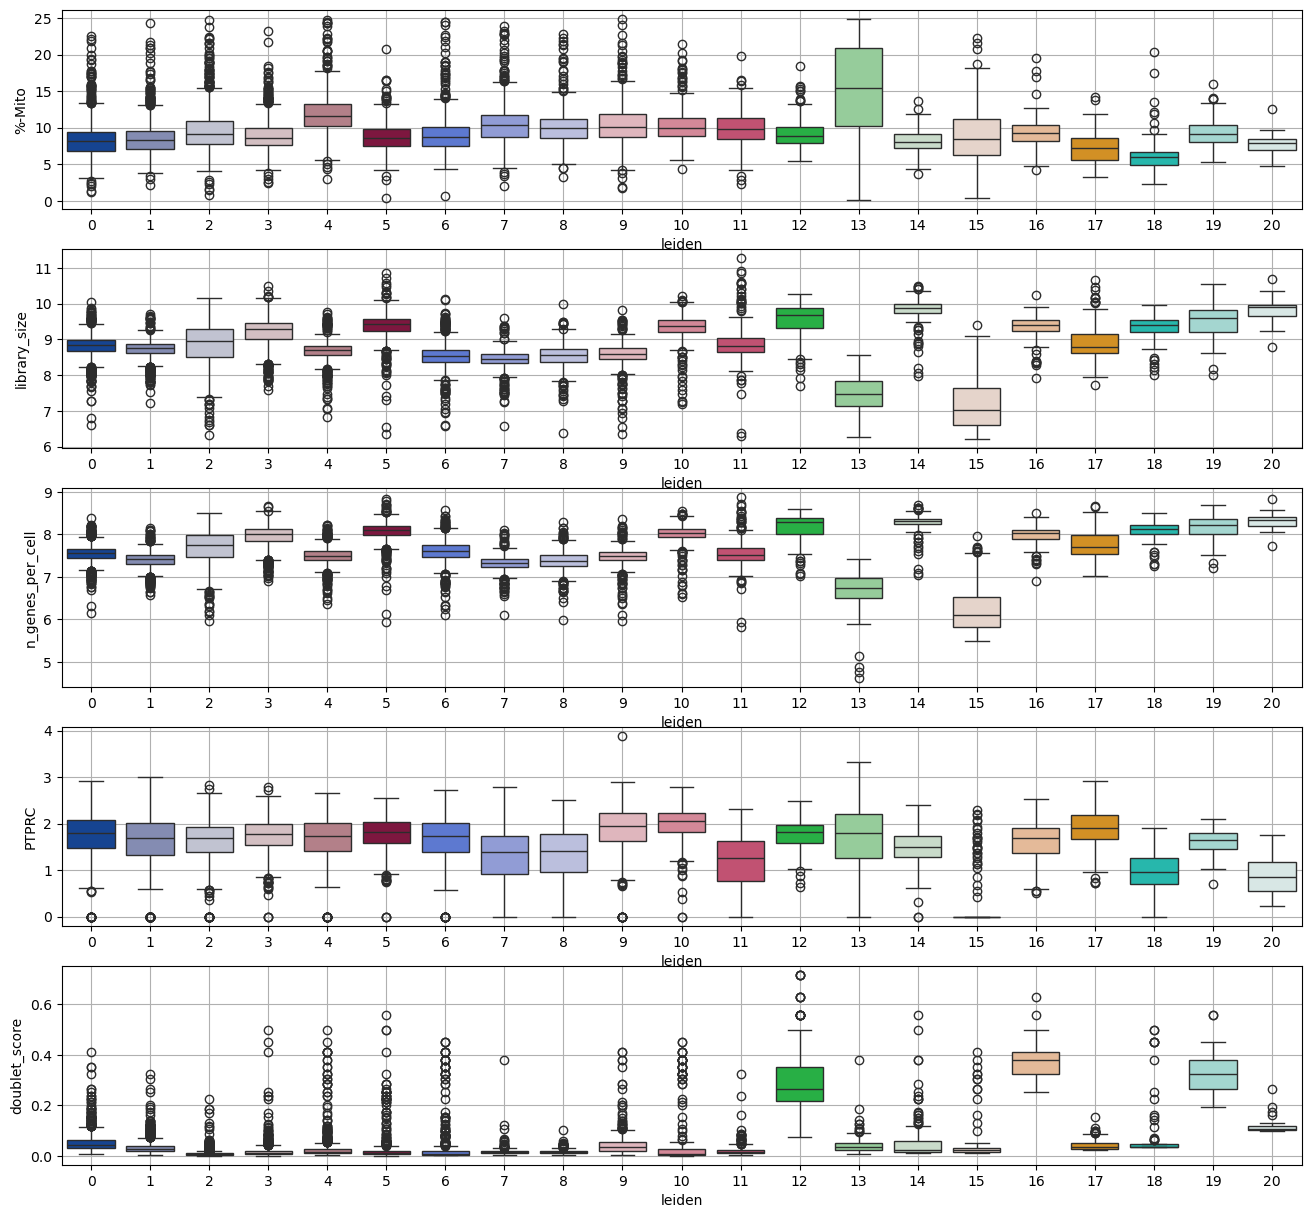

In [28]:
import seaborn as sns
fig = plt.figure(figsize = (8*2, 3*5))
for j, item in enumerate(df_temp.columns[1:]):
    ax = fig.add_subplot(5, 1, j+1)
    sns.boxplot(x = "leiden", y = item, hue = 'leiden', data = df_temp, ax = ax, palette = adata.uns['leiden_colors'])
    ax.grid('on')

## Highlight clusters of interest

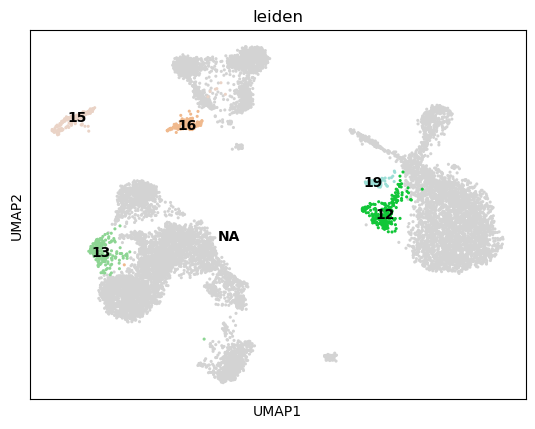

In [32]:
sc.pl.umap(adata, color = ['leiden'], groups=['12', '13', '15', '16', '19'], size = 20, legend_loc='on data')

## Evaluate clusters of interest

In [37]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '12').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,S100A9,16.576546,3.936560,1.029810e-61,1.401880e-57
1,S100A12,16.433168,2.648538,1.107201e-60,7.536164e-57
2,S100A8,16.367336,3.661956,3.272227e-60,1.484827e-56
3,VCAN,15.952807,2.532537,2.723723e-57,9.269511e-54
4,CD14,15.577716,2.072368,1.031759e-54,2.809067e-51
5,AC020656.1,15.500403,1.969106,3.447205e-54,7.821133e-51
6,KLF4,15.222481,1.831660,2.508371e-52,4.878066e-49
7,CEBPD,15.029585,1.829508,4.699404e-51,7.996623e-48
8,CSF3R,14.875255,1.780324,4.771676e-50,7.217425e-47
9,RGS2,14.840100,1.776705,8.063519e-50,1.097687e-46


As we can see, the top genes expressed in C12 are myeloid specific genes. There does not seem to be a clear indication of expression of mutually exclusive genes. Therefore, even though C12 was identified by Scrublet as a doublet cluster, we do not have enough evidence to remove it. Therefore, we will not remove C12 from downstream analysis.

In [38]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '13').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MALAT1,21.886650,1.465427,3.481868e-106,2.369933e-102
1,DDX17,12.550839,1.227474,3.933203e-36,4.056265e-34
2,MT-ATP6,11.670774,0.479414,1.797819e-31,1.315791e-29
3,NKTR,11.263458,1.875936,1.988000e-29,1.247127e-27
4,MT-ND5,10.901463,0.566288,1.134199e-27,6.200741e-26
5,SYNE2,10.604657,2.463919,2.835025e-26,1.388245e-24
6,MT-CO1,10.181421,0.285837,2.400292e-24,1.002306e-22
7,MT-CO3,9.963685,0.299231,2.197619e-23,8.491994e-22
8,MT-CYB,8.929936,0.325699,4.262554e-19,1.206365e-17
9,CLEC2D,8.109892,1.494782,5.066473e-16,1.123288e-14


As we can see, the top genes expressed in C13 are mostly mitochondria related (MT-*). This indicates that cells in C13 are likely undergoing apopotosis, so we will remove them from downstream analysis.

In [36]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '15').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,PF4,22.408298,11.265288,3.266825e-111,1.709357e-107
1,NRGN,22.405281,8.493391,3.495807e-111,1.709357e-107
2,PPBP,22.401953,11.509600,3.767039e-111,1.709357e-107
3,CAVIN2,22.271830,10.736561,6.931174e-110,2.001339e-106
4,TUBB1,22.269196,10.613053,7.350836e-110,2.001339e-106
5,GNG11,22.136393,10.624887,1.410899e-108,3.201094e-105
6,OAZ1,21.953320,3.144894,8.050180e-107,1.565530e-103
7,TAGLN2,21.622896,4.406320,1.093926e-103,1.861451e-100
8,CCL5,21.422211,5.656804,8.295641e-102,1.254762e-98
9,H3F3A,21.358784,2.582479,3.231103e-101,4.398501e-98


We isolated C15 because it had low expression of PTPRC, which is a universal gene expressed by all immune cells. And since this data contains only immune cells, we expected all clusters to express PTPRC expression. However, C15 for some reson does not express a lot of PTPRC, it instead has expression of genes that are expressed in Platelet cells. Now we can choose to keep or remove Platelets from analysis. If we believe we will analyze platelet cells then we can keep C15 else discard it from downstream analysis. For now, we will keep it for downstream analysis.

In [41]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '16').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MS4A1,14.420016,3.312709,3.872488e-47,5.271618e-43
1,CD79A,14.104514,3.321831,3.562322e-45,2.424695e-41
2,BANK1,13.438285,2.752105,3.607012e-41,1.636742e-37
3,LINC00926,13.360209,2.813986,1.032742e-40,3.514678e-37
4,CD79B,13.158979,2.540705,1.511141e-39,4.114232e-36
5,IGHM,12.946126,3.806522,2.471119e-38,5.606557e-35
6,CD37,12.684027,1.420882,7.250907e-37,1.410094e-33
7,TNFRSF13C,12.457966,2.679975,1.265571e-35,2.153526e-32
8,IGHD,12.349620,3.060794,4.894240e-35,7.402810e-32
9,CD74,11.793678,2.295802,4.207549e-32,5.727736e-29


As we can see, the top genes expressed in C16 are B-cell specific genes. There does not seem to be a clear indication of expression of mutually exclusive genes. Therefore, even though C16 was identified by Scrublet as a doublet cluster, we do not have enough evidence to remove it. Therefore, we will not remove C16 from downstream analysis.

In [43]:
sc.get.rank_genes_groups_df(adata, key = 'cluster_vs_rest', group = '19').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MS4A1,10.431517,2.590545,1.780233e-25,1.315657e-21
1,CD79A,10.423696,2.227484,1.932941e-25,1.315657e-21
2,IGHM,10.228976,2.977643,1.470659e-24,6.673360e-21
3,RALGPS2,9.814387,2.086400,9.762886e-23,3.322554e-19
4,CD79B,9.544931,1.931611,1.361972e-21,3.708106e-18
5,IGKC,9.436709,3.414101,3.846687e-21,8.727492e-18
6,S100A8,9.000140,3.663194,2.254303e-19,4.383976e-16
7,S100A9,8.945351,3.882839,3.707693e-19,6.309102e-16
8,BANK1,8.800714,1.956390,1.359494e-18,1.919275e-15
9,MPEG1,8.796628,1.927417,1.409884e-18,1.919275e-15


As we can see, the top genes expressed in C19 are a combination of B-cell specific genes (MS4A1, CD79A) and myeloid specific genes (S100A8, S100A9). These two cell types should be mutually exclusive, and these marker genes should not be co-expressed. Therefore, we will remove C19 from downstream analysis as it seems it was correctly identified by Scrublet as a doublet cluster.

## Remove C13 and C19

In [44]:
clusters_to_remove = ['13', '19']
adata_clean = adata[~np.isin(adata.obs['leiden'], clusters_to_remove), :].copy()

In [45]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap', 'leiden', 'leiden_colors', 'cluster_vs_rest'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'connectivities', 'distances'

In [48]:
# check
adata_clean.obs['leiden'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '14', '15', '16', '17', '18', '20'],
      dtype='object')

# Recompute HVG onwards

In [50]:
# HVG
sc.pp.highly_variable_genes(adata_clean, layer = 'raw_data', n_top_genes = 4000, flavor = 'seurat_v3')

In [51]:
# PCA
sc.tl.pca(adata_clean, n_comps=30, use_highly_variable=True)

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/scanpy/preprocessing/_pca/__init__.py:438: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


In [52]:
# Nearest neighbor graph
sc.pp.neighbors(adata_clean, n_neighbors=30, use_rep='X_pca', metric='euclidean')

/usr/local/Caskroom/miniforge/base/envs/workshop_2025/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [53]:
# UMAP 
sc.tl.umap(adata_clean, min_dist=0.1)

In [54]:
# Clustering
sc.tl.leiden(adata_clean, resolution = 1)

In [55]:
# Differentially expressed genes
sc.tl.rank_genes_groups(adata_clean, groupby='leiden', method = 'wilcoxon', key_added='cluster_vs_rest')

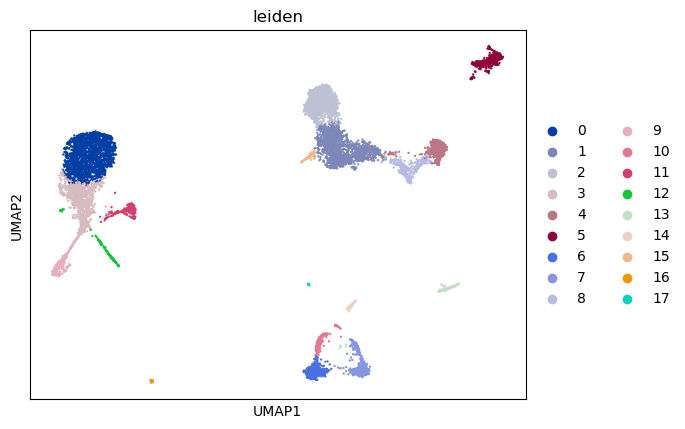

In [56]:
# Visualize
sc.pl.umap(adata_clean, color = 'leiden')

In [57]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap', 'leiden', 'leiden_colors', 'cluster_vs_rest'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_data'
    obsp: 'connectivities', 'distances'

## Example task for workshop practice session:

As we discussed in the lecture part, leiden is an unsupervised clustering approach. It implies that we do not need to provide the number of clusters we want apriori. However, it does have an important parameter called `resolution` that controls the size of the clusters. Higher resolution means more but smaller clusters, while lower resolution means fewer but larger clusters. We discussed that while we can use prior knowledge to choose a default value of `resolution`, we want to ensure that our results are robust to minor fluctuations around that value. 

In this hands-on session, we will briefly evaluate this, using two metrics for clustering consistency: adjusted rand index and normalized mutual information score. 

A. We used resolution = 1 above to compute the clusters. Now, compute leiden results for resolution values in [0.8, 0.9, 1, 1.1, 1.2] and store them in your adata. Hint: use the `key_added` parameter in sc.tl.leiden.

In [2]:
res_set = [0.8, 0.9, 1, 1.1, 1.2]

B. Now, import adjusted rand index and adjusted normalized mutual information score from `sklearn.metrics` and evaluate your results above. You want to compute a pandas dataframe whose index and columns are the different resolution values you used, and the entry is the corresponding rand score or mutual information for those resolution values.

In [61]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score




Visualize the above results as a heatmap with resolution values on the x-axis and the y-axis. Each entry in the heatmap indicates the adjusted rand index or normalized mutual informations score for the clustering results associated with the x and y parameter. Feel free to import seaborn package to make a heatmap.

In [1]:
import seaborn as sns



As we can see, the clustering results is quite robust around minor fluctuations around the used value of `resolution = 1`.

# Celltyping

Identifying the types of cells (or cluster of cells) is an important step in single-cell RNA-seq data analysis. We will look at two simple approaches for this. First we will look at the manual approach where it is assumed that the user knows marker genes that identify with each of the celltype they are interested in. Second, we will look at an automated approaches (Celltypist and Scimilarity) that will automatically annotate each cluster.

## Manual Celltyping

In [94]:
cell_types = {}
cell_types['Naive_CD4'] = ['CD3E', 'IL7R', 'CCR7', 'CD4']

cell_types['CD8+_T'] = ['CD3E', 'CD8A', 'GZMB', 'GZMA']
cell_types['NK_cells'] = ['GZMA', 'KLRG1']

cell_types['Myeloid'] = ['CD14', 'CD68', 'CCR5']

cell_types['B_cells'] = ['MS4A1', 'CD19', 'CD79A', 'BANK1']

cell_types['Platelets'] = ['PPBP', 'PF4']

categories: 0, 1, 2, etc.
var_group_labels: Naive_CD4, CD8+_T, NK_cells, etc.


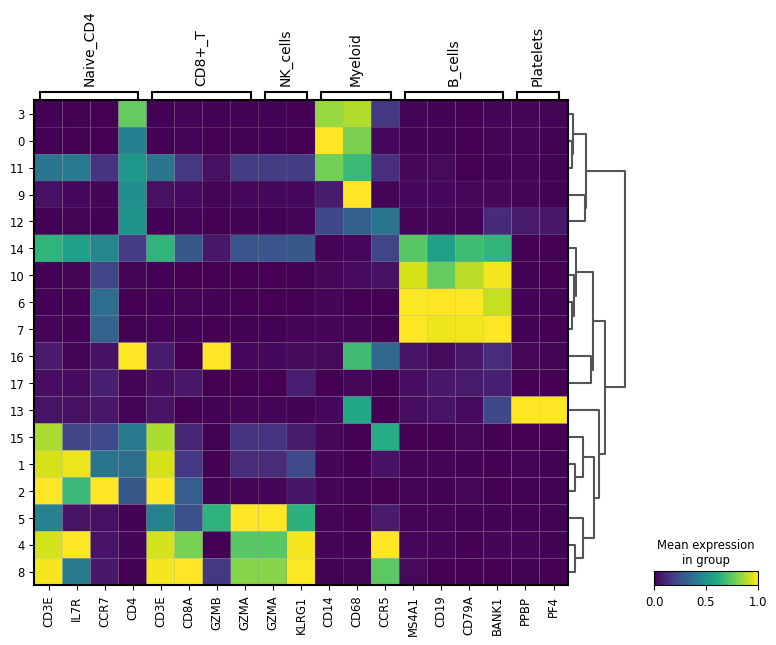

In [95]:
sc.pl.matrixplot(adata_clean, groupby='leiden', var_names=cell_types, standard_scale='var', dendrogram=True)

categories: 0, 1, 2, etc.
var_group_labels: Naive_CD4, CD8+_T, NK_cells, etc.


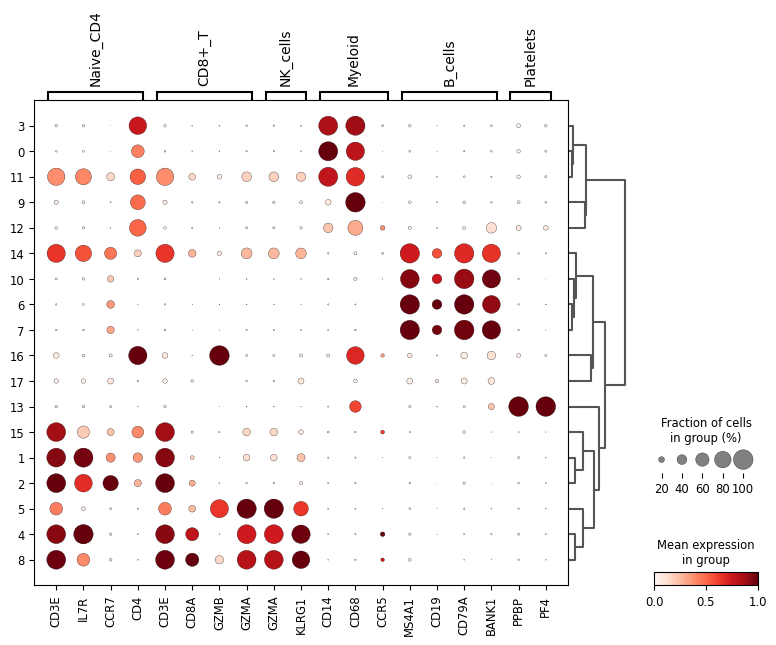

In [96]:
sc.pl.dotplot(adata_clean, groupby='leiden', var_names=cell_types, standard_scale='var', dendrogram=True)

### Example annotation

In [105]:
cluster_map = {'0': 'Myeloid', 
               '1':'CD4 T cell', 
               '2': 'CD4 T cell', 
               '3': 'Myeloid', 
               '4': 'CD8 T cell', 
               '5': 'NK cell', 
               '6': 'B cell', 
               '7': 'B cell', 
               '8': 'CD8 T cell', 
               '9': 'Myeloid', 
               '10': 'B cell', 
               '11': 'T cell/Myeloid', 
               '12': 'Myeloid', 
               '13': 'Platelets', 
               '14': 'T cell/B cell', 
               '15': 'CD4 T cell', 
               '16': 'T cell/Myeloid', 
               '17': 'Unknown'}

In [106]:
adata_clean.obs['celltype'] = adata_clean.obs['leiden'].map(cluster_map)

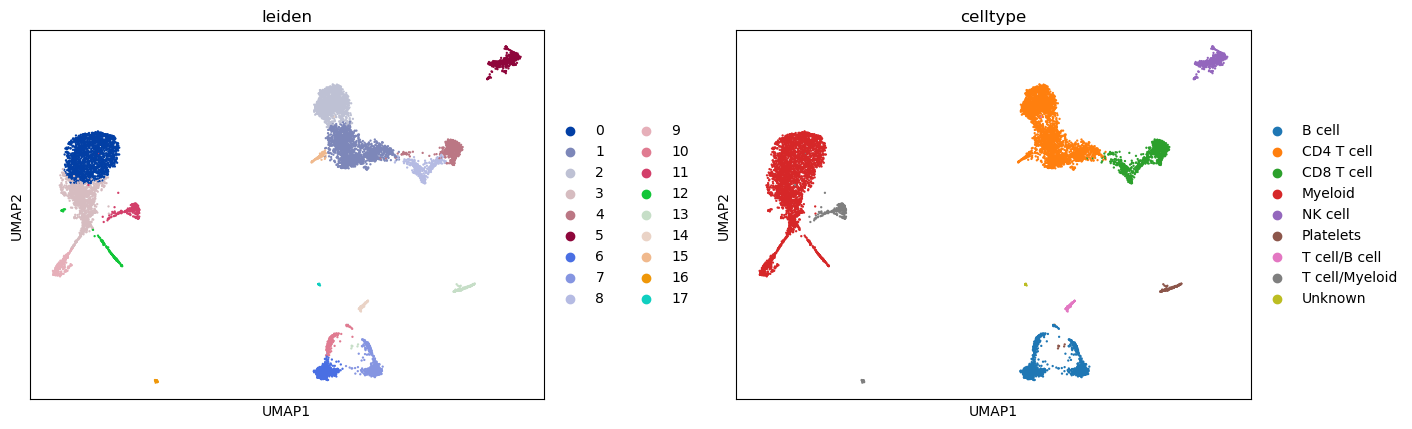

In [107]:
sc.pl.umap(adata_clean, color = ['leiden', 'celltype'], wspace = 0.25)

### Check DEGs in C11, C14 and C16

In [109]:
sc.get.rank_genes_groups_df(adata_clean, group='11', key = 'cluster_vs_rest').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,S100A9,16.664698,3.938581,2.366805e-62,3.221932e-58
1,S100A12,16.499655,2.640628,3.689914e-61,2.511540e-57
2,S100A8,16.435915,3.660331,1.058156e-60,4.801560e-57
3,VCAN,15.923276,2.509880,4.368919e-57,1.486852e-53
4,CD14,15.662184,2.066717,2.743146e-55,7.468489e-52
5,AC020656.1,15.402433,1.937973,1.576252e-53,3.576254e-50
6,KLF4,15.103326,1.799369,1.539680e-51,2.994238e-48
7,CEBPD,15.071316,1.817120,2.500818e-51,4.255454e-48
8,CSF3R,15.006275,1.780730,6.679488e-51,1.010310e-47
9,RGS2,14.912290,1.760964,2.741878e-50,3.732519e-47


C11 has mostly myeloid markers as highest expressed, so we will call it Myeloid.

In [110]:
sc.get.rank_genes_groups_df(adata_clean, group='14', key = 'cluster_vs_rest').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,MS4A1,14.396138,3.318685,5.471693e-47,7.448615e-43
1,CD79A,14.045630,3.318685,8.193705e-45,5.577046e-41
2,BANK1,13.412751,2.745991,5.091452e-41,2.310331e-37
3,LINC00926,13.352967,2.811953,1.138228e-40,3.873674e-37
4,CD79B,13.141339,2.539241,1.908180e-39,5.195212e-36
5,IGHM,12.902790,3.813348,4.340888e-38,9.848752e-35
6,CD37,12.618649,1.398581,1.666539e-36,3.240943e-33
7,TNFRSF13C,12.433388,2.672067,1.721794e-35,2.929848e-32
8,IGHD,12.337757,3.061402,5.671354e-35,8.578238e-32
9,CD74,11.688053,2.275800,1.467114e-31,1.997183e-28


C14 has mostly B cell markers as highest expressed, so we will call it B cell.

In [115]:
sc.get.rank_genes_groups_df(adata_clean, group='16', key = 'cluster_vs_rest').head(30)

,names,scores,logfoldchanges,pvals,pvals_adj
0,UGCG,15.612553,6.213753,5.979606e-55,2.521880e-51
1,CCDC50,15.610687,6.005412,6.157009e-55,2.521880e-51
2,PLD4,15.599215,6.774751,7.369478e-55,2.521880e-51
3,IRF8,15.598863,5.317875,7.410210e-55,2.521880e-51
4,TCF4,15.574159,5.872300,1.090789e-54,2.969782e-51
5,JCHAIN,15.530274,7.164991,2.164501e-54,4.910892e-51
6,LILRA4,15.428959,10.118407,1.045435e-53,1.827102e-50
7,SEC61B,15.419439,2.978273,1.211516e-53,1.827102e-50
8,APP,15.413738,4.680998,1.323301e-53,1.827102e-50
9,SERPINF1,15.412824,7.937918,1.342174e-53,1.827102e-50


C16 has high expression of IRF8, which is a gene important in myeloid cell development, so we will label C16 as Myeloid.

In [121]:
sc.get.rank_genes_groups_df(adata_clean, group='17', key = 'cluster_vs_rest').head(20)

,names,scores,logfoldchanges,pvals,pvals_adj
0,SOX4,9.094124,5.202611,9.535180e-20,1.298024e-15
1,PRSS57,8.973198,9.002110,2.880281e-19,1.960463e-15
2,CDK6,8.801563,5.248185,1.349233e-18,4.591779e-15
3,LAPTM4B,8.492414,6.031924,2.023879e-17,3.935866e-14
4,STMN1,8.466765,4.375993,2.523021e-17,4.203657e-14
5,EBPL,8.455490,3.193788,2.779176e-17,4.203657e-14
6,NPM1,8.311482,2.061364,9.451392e-17,1.169653e-13
7,HSP90AB1,8.271429,2.260024,1.323625e-16,1.491753e-13
8,ZFAS1,8.262663,2.319877,1.424578e-16,1.491753e-13
9,AC084033.3,8.219481,5.918181,2.043849e-16,1.884767e-13


In [120]:
sc.get.rank_genes_groups_df(adata_clean, group='17', key = 'cluster_vs_rest').tail(15)

,names,scores,logfoldchanges,pvals,pvals_adj
13598,CYBA,-6.397705,-1.564997,1.577296e-10,2.105072e-08
13599,CALM1,-6.423472,-1.885746,1.332003e-10,1.888809e-08
13600,CD52,-6.578608,-2.053132,4.748742e-11,7.605250e-09
13601,BTG1,-6.648826,-1.760635,2.954405e-11,5.156194e-09
13602,PTPRC,-6.681677,-1.430657,2.362234e-11,4.287612e-09
13603,ACTB,-6.799120,-1.208293,1.052598e-11,2.138660e-09
13604,JUNB,-6.845814,-2.078668,7.604198e-12,1.643110e-09
13605,CORO1A,-7.029462,-1.812996,2.073314e-12,4.783733e-10
13606,KLF2,-7.591384,-3.060796,3.165053e-14,1.196830e-11
13607,TMSB10,-8.107233,-1.255546,5.178561e-16,3.710303e-13


It is hard to say what C17 is, but from the `tail` above, we see that it has low expression of PTPRC. On that grounds, we can remove C17 from downstream analysis. If you remove C17, you will have to re-do processing from HVG onwards.

Refine the cluster map:

In [122]:
cluster_map = {'0': 'Myeloid', 
               '1':'CD4 T cell', 
               '2': 'CD4 T cell', 
               '3': 'Myeloid', 
               '4': 'CD8 T cell', 
               '5': 'NK cell', 
               '6': 'B cell', 
               '7': 'B cell', 
               '8': 'CD8 T cell', 
               '9': 'Myeloid', 
               '10': 'B cell', 
               '11': 'Myeloid', 
               '12': 'Myeloid', 
               '13': 'Platelets', 
               '14': 'B cell', 
               '15': 'CD4 T cell', 
               '16': 'Myeloid', 
               '17': 'Low PTPRC'}

In [123]:
adata_clean.obs['celltype'] = adata_clean.obs['leiden'].map(cluster_map)

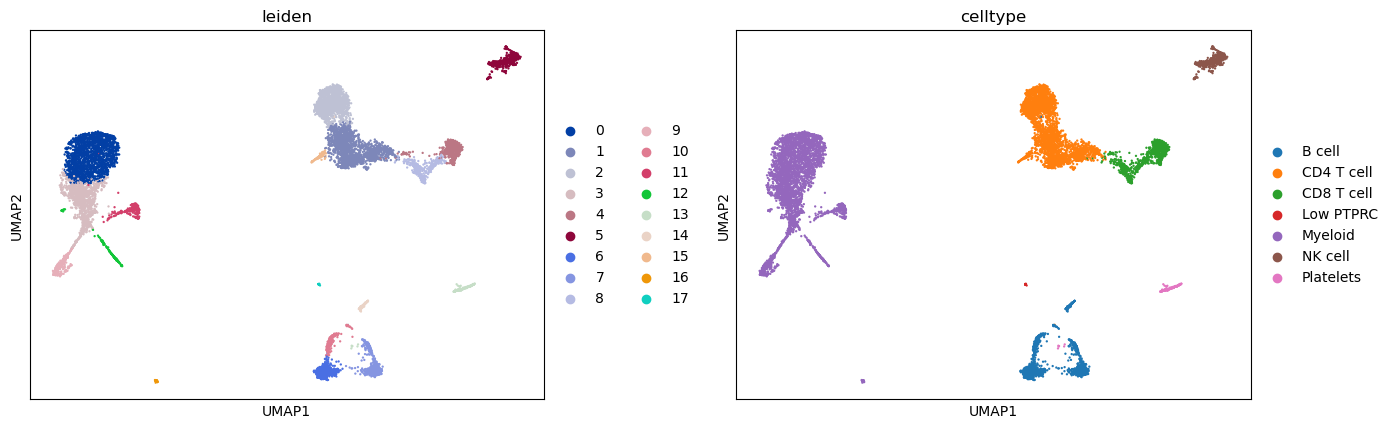

In [124]:
sc.pl.umap(adata_clean, color = ['leiden', 'celltype'], wspace = 0.25)

## Automated celltyping: Celltypist

CellTypist is a tool that allows for easy celltype annotation of cell clusters in scRNAseq data. The basic idea of Celltypist is to use a model that is trained on a well-annotated single-cell data and test it on your data. There are a variety of pretrained models avaliable to use to label cells/clusters. Additionally, you can train your own model as well using CellTypist. We will go over downloading models, prepping data for testing, using CellTypist to annotate, and checking the quality of the annotations.


### Models and Data

CellTypist provides a variety of models avaliable to download from https://www.celltypist.org/models. Most models are for immune cells, sourced from multiple different organisms and tissues, and vary in health and diseases. Models are saved as pickle files. For more details on the biological context please study the metadata of each model available in the link above. For example, CellTypist was also trained on a large immune data set (see the original CellTypist paper: https://doi.org/10.1126/science.abl5197) and the model are called  Immune_All_Low.pkl and Immune_All_High.pkl. They are the same except for the granularity of the data; the 'low' model has 32 cell types ('low resolution') and the 'high' model has 98 cell types ('high resolution'). 

The first step is to identify which model will best suit your needs. Things to consider are: conditions of your data (healthy, diseased), organism and tissue used in the model, and any expected cell types to be most represented in your data. Once you have chosen which model to use, the next step is to dowload and load the model into your notebook. For more details on downloading and viewing details of a CellTypist model, see sections 1.2-1.4 of the Usage section of the Github README file (https://github.com/Teichlab/celltypist). 

In [7]:
import celltypist
from celltypist import models

# %%
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


,model,description
0,Immune_All_Low.pkl,immune sub-populations combined from 20 tissue...
1,Immune_All_High.pkl,immune populations combined from 20 tissues of...
2,Adult_Mouse_Gut.pkl,cell types in the adult mouse gut combined fro...
3,Autopsy_COVID19_Lung.pkl,cell types from the lungs of 16 SARS-CoV-2 inf...
4,COVID19_HumanChallenge_Blood.pkl,detailed blood cell states from 16 individuals...
5,COVID19_Immune_Landscape.pkl,immune subtypes from lung and blood of COVID-1...
6,Cells_Fetal_Lung.pkl,cell types from human embryonic and fetal lungs
7,Cells_Intestinal_Tract.pkl,"intestinal cells from fetal, pediatric (health..."
8,Cells_Lung_Airway.pkl,cell populations from scRNA-seq of five locati...
9,Developing_Human_Brain.pkl,cell types from the first-trimester developing...


We are currently working with human PBMC data, which are blood cells. We typically expect immune cells in the blood, so we will load the Immune model from celltypist. 

In [8]:
# to download an original CellTypist model 
# models.download_models() # all CellTypist Models
models.download_models(model = 'Immune_All_Low.pkl') #download one of them

📂 Storing models in /Users/sharmar1/.celltypist/data/models
💾 Total models to download: 1
⏩ Skipping [1/1]: Immune_All_Low.pkl (file exists)


Once you have your model, the next step is to confirm that your data is in an appropriate form for CellTypist. CellTypist annotate single-cell RNAseq data and can handle either data in a count table (eg .csv, .txt, .mtx, etc) or as AnnData saved in an .h5ad file. We recommend data in .h5ad files for easiest use. 

Since we already have `adata` loaded, we can proceed with it.

Once the data is loaded, there are two things to check with your adata. First, make sure your `adata.var_names` is your gene names (and not Ensemble ID for example) and second make sure `adata.obsm['X_umap']` has a pre-computed UMAP for your data.

In [11]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'cluster_vs_rest', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers:

**Celltypist works with the raw counts so let's create a new adata which has raw counts saved in adata_clean.raw:**

In [13]:
# create another adata with just raw data, obs and var
adata_celltypist = sc.AnnData(adata_clean.layers['raw_data'].copy(), obs = adata_clean.obs, var = adata_clean.var)

# normalize to 10000 <- specifically needed for celltypist
sc.pp.normalize_total(adata_celltypist, target_sum = 10000, inplace = True)

# log
sc.pp.log1p(adata_celltypist)

# store umap
adata_celltypist.obsm['X_umap'] = adata_clean.obsm['X_umap']

# see
adata_celltypist

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p'
    obsm: 'X_umap'

### Annotate

Now, you should be ready to annotate your data. There are some important parameters for the annotate() function:

1) filename: Path to the file to be annotate or a AnnData object already loaded into memory.<br>
2) model: Path to the model file, model name (if a CellTypist model that has been downloaded), or a :class:~celltypist.models.Model object. <br>
3) majority_voting: Whether to provide a second set annotations based on clusters formed by overclustering. <br>
4) over_clustering: ignore if majority_voting = False. A plain file, python list, tuple, numpy array, pandas series or index, or label of AnnData .obs column. If blank it will use a over-clustering approach based on the size of the data. <br>
5) min_prop: The minimum proportion of cells in a cluster that need to support the dominant cell type for all cells to be assigned that cell type. <br>

For best results, we recommend `annotate(filename = <FILENAME>, model = <MODEL>, majority_voting=True, over_clustering = <cluster_results_in_adata>)` with other default parameters. If you are unhappy with the results, you can adjust the parameters. 

In [14]:
help(celltypist.annotate)

Help on function annotate in module celltypist.annotate:

annotate(filename: Union[anndata._core.anndata.AnnData, str] = '', model: Union[str, celltypist.models.Model, NoneType] = None, transpose_input: bool = False, gene_file: Optional[str] = None, cell_file: Optional[str] = None, mode: str = 'best match', p_thres: float = 0.5, majority_voting: bool = False, over_clustering: Union[str, list, tuple, numpy.ndarray, pandas.core.series.Series, pandas.core.indexes.base.Index, NoneType] = None, use_GPU: bool = False, min_prop: float = 0) -> celltypist.classifier.AnnotationResult
    Run the prediction and (optional) majority voting to annotate the input dataset.
    
    Parameters
    ----------
    filename
        Path to the input count matrix (supported types are csv, txt, tsv, tab and mtx) or AnnData (h5ad).
        If it's the former, a cell-by-gene format is desirable (see `transpose_input` for more information).
        Also accepts the input as an :class:`~anndata.AnnData` object 

In [15]:
predictions = celltypist.annotate(adata_celltypist, model = 'Immune_All_Low.pkl', majority_voting=True, over_clustering = 'leiden') 

🔬 Input data has 10911 cells and 13613 genes
🔗 Matching reference genes in the model
🧬 4483 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


In [16]:
predictions

CellTypist prediction result for 10911 query cells
    predicted_labels: data frame with 3 columns ('predicted_labels', 'over_clustering', 'majority_voting')
    decision_matrix: data frame with 10911 query cells and 98 cell types
    probability_matrix: data frame with 10911 query cells and 98 cell types
    adata: AnnData object referred

The output of this function is an `celltypist.classifier.AnnotationResult` object which is not particularly easy to work with. For a more workable end result, convert this output into AnnData. This AnnData object will have some important information in .obs: a column predicted_labels that contains the cell type annotation without majority voting, a column conf_score that contains the confidence score for each cell's predicted_labels label, and (if you used majority voting) a column majority_voting that contains the cell type labels curated through clustering. 

In [17]:
adata_preds = predictions.to_adata()
adata_preds

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p'
    obsm: 'X_umap'

In [18]:
adata_preds.obs[['predicted_labels', 'conf_score', 'over_clustering', 'majority_voting']]

,predicted_labels,conf_score,over_clustering,majority_voting
AAACCCAAGCGCCCAT-1,Tem/Trm cytotoxic T cells,0.383419,1,Tcm/Naive helper T cells
AAACCCAAGGTTCCGC-1,DC2,0.995987,12,DC2
AAACCCACAGAGTTGG-1,Classical monocytes,0.999991,0,Classical monocytes
AAACCCACAGGTATGG-1,CD16+ NK cells,0.999999,5,CD16+ NK cells
AAACCCACATAGTCAC-1,Naive B cells,1.000000,7,Naive B cells
...,...,...,...,...
TTTGTTGGTGCGTCGT-1,Tcm/Naive helper T cells,0.999610,2,Tcm/Naive helper T cells
TTTGTTGGTGTCATGT-1,Classical monocytes,0.999848,0,Classical monocytes
TTTGTTGGTTTGAACC-1,MAIT cells,0.999967,4,MAIT cells
TTTGTTGTCCAAGCCG-1,Tcm/Naive helper T cells,0.929951,1,Tcm/Naive helper T cells


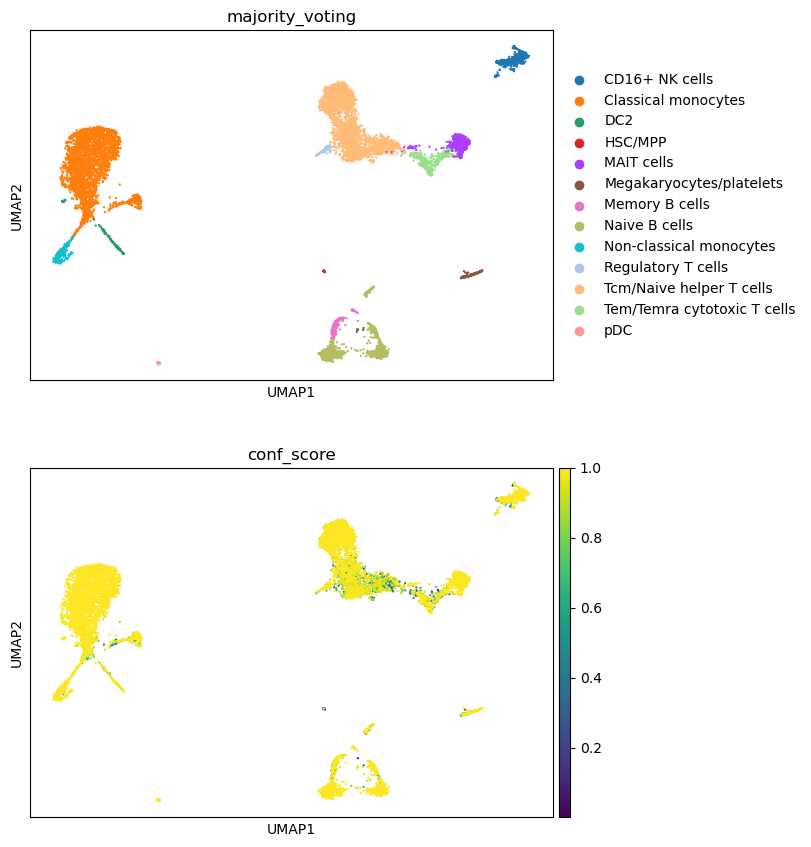

In [19]:
sc.pl.umap(adata_preds, color = ['majority_voting', 'conf_score'], ncols = 1)

As shown above, we can look at a UMAP coloured by the confidence score. It is normal for there to be some proportion of cells with low confidence scores, meaning the model was unsure in its annotation. However, if the number of confidently mapped cells is similar to cells mapped with low confidence, something may have gone wrong or the Celltypist model you are using is not appropriate. Also, by looking at the UMAP, you can see if there are certain clusters or cell types that the model had a harder time labelling. By pairing it with the UMAP coloured by cell types, you can look at the relationship between confidence score and your own confidence in the labels.

The UMAP colored by celltypes lets you see if a concerning proportion of the cells are labeled with one cell type. You can evaluate if you are seeing expected celltypes in your data. If you see weird celltypes then the celltypist model used may not be appropriate.

### Transfer the results to `adata_clean`

In [20]:
columns_to_copy = ['predicted_labels', 'conf_score', 'over_clustering', 'majority_voting']
adata_clean.obs[columns_to_copy] = adata_preds.obs[columns_to_copy].loc[adata_clean.obs_names]

In [21]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype', 'predicted_labels', 'conf_score', 'over_clustering', 'majority_voting'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'cluster_vs_rest', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 's

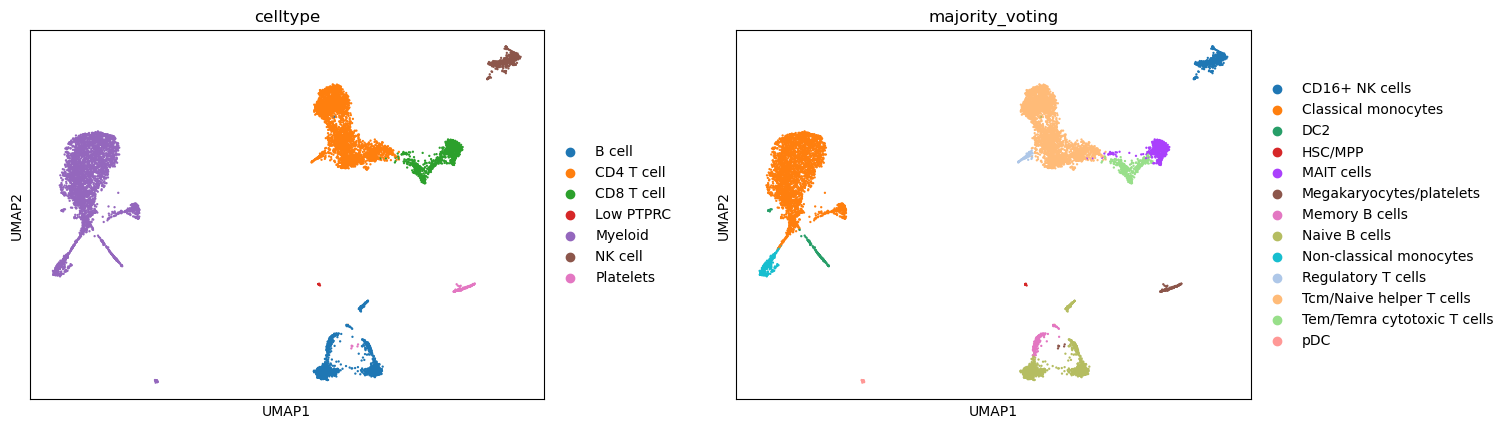

In [23]:
sc.pl.umap(adata_clean, color = ['celltype', 'majority_voting'], wspace = 0.25)

## Automated celltyping: Scimilarity

SCimilarity is a computational method that creates a unified representation of single-cell transcriptomes. It uses machine learning techniques to:

1. **Embed cells into a meaningful low-dimensional space**

2. **Enable rapid, large-scale cell searching**

Scimilarity has already been trained on 23 million healthy human cells. We can now use the existing model to embed our data onto the latent through which we can automatically celltype annotate our data. Because Scimilarity was developed only on healthy human cells, it's application is limited to the same cells (i.e. it cannot be used on mouse data as is). Essentially, for healthy human cellsScimilarity allows us to:

- Automatically annotate cells with cell types (zero-shot approach)
- Search through millions of cell profiles to find cells most similar to a query cell

We'll walk through how to use SCimilarity to explore and gain insights from single-cell data. 

In order to use SCimilarity, we need to download the model. We can do so by running the following cell (you only need to do this once). You may have already done this prior to the workshop.

In [27]:
# !curl -L -o /Users/sharmar1/Dropbox/msk_workshop/Handong_2025/session_3/model_v1.1.tar.gz https://zenodo.org/records/10685499/files/model_v1.1.tar.gz?download=1
# !tar -xzvf /Users/sharmar1/Dropbox/msk_workshop/Handong_2025/session_3/model_v1.1.tar.gz

Alternatively, you can go to [this link](https://zenodo.org/records/10685499) and download the model from there. It's a large file so downloading and extracting it will take some time.

We can now run scimilarity for performing the two tasks we mentioned above.

### Task 1: Cell Annotation

Cell annotation in SCimilarity automatically assigns cell types by comparing our single-cell data to a comprehensive reference atlas on which it was trained. It matches each cell to its most similar cell type, and also provides confidence metrics about the prediction.

Keep in mind that the datasets that you analyze with SCimilarity should fit the following criteria:
  - Data generated from the 10x Genomics Chromium platform (models are trained using this data only).
  - Human scRNA-seq data.

If not, then the annotations may not be reliable. 

#### Step 1: Prepare for SCimilarity: Import and normalize data

In [3]:
from scimilarity import CellAnnotation

In [4]:
# Instantiate the CellAnnotation object
# Set model_path to the location of the uncompressed model
model_path = "/Users/sharmar1/Downloads/model_v1.1/"
ca = CellAnnotation(model_path=model_path)

#### Step 2: Prepare data to input to Scimilarity

In [5]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'cluster_vs_rest', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'predicted_doublet_colors', 'scrublet', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers:

SCimilarity requires new data to be processed in a specific way that matches how the model was trained. This means aligning the gene space and normalizing accordingly.

SCimilarity's gene expression ordering is fixed. New data should be reorderd to match that, so that it is consistent with how the model was trained. Genes that are not present in the new data will be zero filled to comply to the expected structure. Genes that are in your data but not present in SCimilarity's gene ordering will be filtered out. 

Note: SCimilarity was trained with high data dropout to increase robustness to differences in gene lists. It's trained on more than 28k genes, and as long as there is a decent amount of overlap (at least a couple of thousand), we can proceed with the analysis.

To simplify this, let's create a new anndata object called `adata_sci` using only the relevant elements from `adata_clean` above.

In [6]:
adata_sci = sc.AnnData(adata_clean.layers['raw_data'], 
                       obs = adata_clean.obs[['leiden']], 
                       var = adata_clean.var[['gene_ids', 'feature_types', 'genome']],
                       obsm = {'X_umap': adata_clean.obsm['X_umap']})

In [7]:
adata_sci

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'leiden'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'X_umap'

In [8]:
from scimilarity.utils import lognorm_counts, align_dataset

# align the dataset gene space
adata_sci = align_dataset(adata_sci, ca.gene_order)

In [9]:
adata_sci   # we now see that its aligned to the 28k genes scimilarity was trained on

AnnData object with n_obs × n_vars = 10911 × 28231
    obs: 'leiden'
    uns: 'orig_genes'
    obsm: 'X_umap'

In [10]:
# normalize the dataset according to what scimilarity expects. 
# we need to have layers attribute and the counts in the layers attribute

adata_sci.layers['counts'] = adata_sci.X.copy()
adata_sci = lognorm_counts(adata_sci)  # this is normalizing using 10k target sum

Now, our dataset is ready for SCimilarity.

#### Step 3: Compute Embeddings

Now, using the model that we downloaded, we can create embeddings of our dataset

In [11]:
adata_sci.obsm["X_scimilarity"] = ca.get_embeddings(adata_sci.X)
adata_sci

AnnData object with n_obs × n_vars = 10911 × 28231
    obs: 'leiden'
    uns: 'orig_genes'
    obsm: 'X_umap', 'X_scimilarity'
    layers: 'counts'

In [12]:
adata_sci.obsm['X_scimilarity'].shape

(10911, 128)

Our data has been embedded into the Scimilarity space, which has 128 dimensions. We will operate on this space to do cell type annotation, and other analysis.

#### Step 4: Celltype classification

We can get annotations using `get_predictions_knn` function in Scimilarity.

*Description of inputs*
 - `X_scimilarity`: embeddings from the model, which can be used to generate UMAPs in lieu of PCA and is generalized across datasets.   

*Description of outputs*
 - `predictions`: cell type annotation predictions.
 - `nn_idxs`: indicies of cells in the SCimilarity reference that are closest to our data. 
 - `nn_dists`: the minimum distance within k=50 nearest neighbors.
 - `nn_stats`: a dataframe containing useful metrics.
 - `hits`: the distribution of celltypes in k=50 nearest neighbors.

There two ways to perform celltype classification using Scimilarity. First is the unconstrained annotation, where the model tells us what the celltypes in our data are without any constraints. Second is the constrained annotation, where the model tells us what the celltypes in our data are among the possible celltypes we provide as an input (constraints). We will look at both approaches below. 

##### Option 1: Unconstrained annotation
Here, cells are classified using all the available celltypes in the SCimilarity reference.

In [13]:
predictions_adata, nn_idxs_adata, nn_dists_adata, nn_stats_adata = ca.get_predictions_knn(adata_sci.obsm["X_scimilarity"])
adata_sci.obs["predictions_unconstrained"] = predictions_adata.values

Get nearest neighbors finished in: 0.00982815424601237 min


100%|███████████████████████████████████| 10911/10911 [00:02<00:00, 3972.76it/s]


In [14]:
adata_sci.obs['predictions_unconstrained']

AAACCCAAGCGCCCAT-1                                               T cell
AAACCCAAGGTTCCGC-1                                             monocyte
AAACCCACAGAGTTGG-1                                   classical monocyte
AAACCCACAGGTATGG-1                                  natural killer cell
AAACCCACATAGTCAC-1                                         naive B cell
                                            ...                        
TTTGTTGGTGCGTCGT-1                           CD4-positive helper T cell
TTTGTTGGTGTCATGT-1                                             monocyte
TTTGTTGGTTTGAACC-1                             mucosal invariant T cell
TTTGTTGTCCAAGCCG-1                                               T cell
TTTGTTGTCTTACTGT-1    naive thymus-derived CD4-positive, alpha-beta ...
Name: predictions_unconstrained, Length: 10911, dtype: object

##### Visualization

We can visualize the predictions on our UMAP:

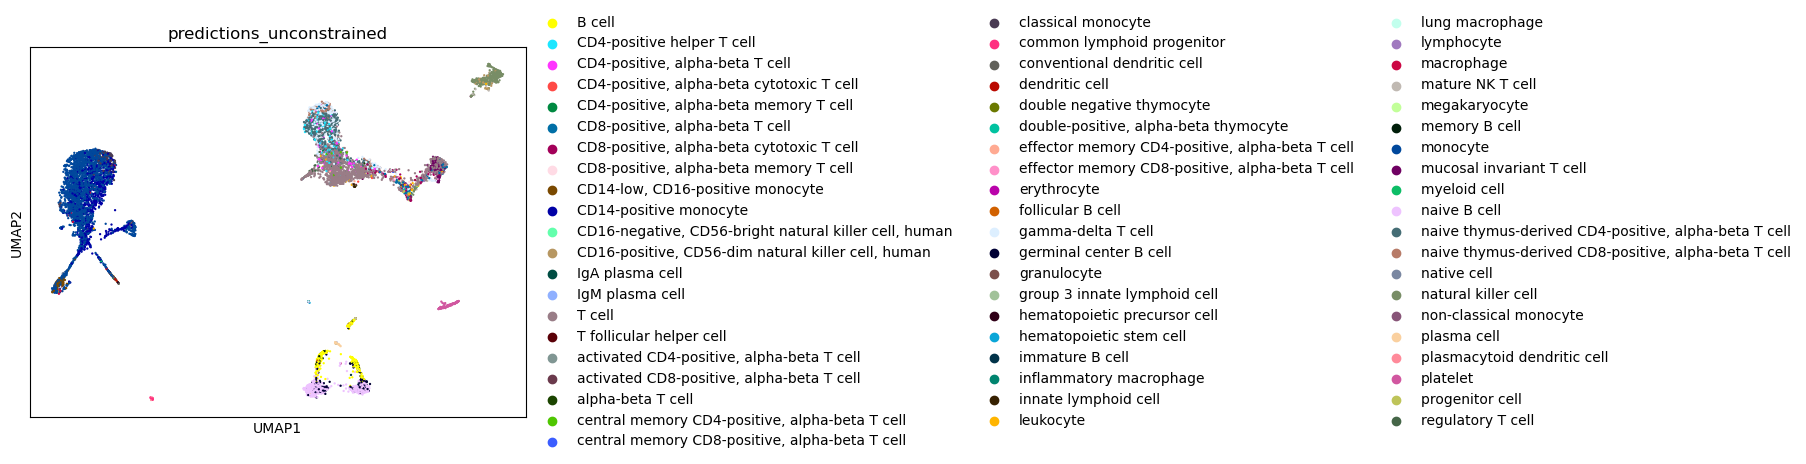

In [15]:
sc.pl.umap(adata_sci, color = ['predictions_unconstrained'])

##### Composition per cluster

In [16]:
df_cluster = adata_sci.obs[['leiden', 'predictions_unconstrained']]
df_cluster.head()

,leiden,predictions_unconstrained
AAACCCAAGCGCCCAT-1,1,T cell
AAACCCAAGGTTCCGC-1,12,monocyte
AAACCCACAGAGTTGG-1,0,classical monocyte
AAACCCACAGGTATGG-1,5,natural killer cell
AAACCCACATAGTCAC-1,7,naive B cell


In [17]:
celltype_counts = df_cluster.groupby("leiden")["predictions_unconstrained"].value_counts().unstack(fill_value=0)

/var/folders/x1/3bxg2yyn42x6m5tcv9l5k511m4dgnw/T/ipykernel_86641/732533565.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celltype_counts = df_cluster.groupby("leiden")["predictions_unconstrained"].value_counts().unstack(fill_value=0)


In [18]:
celltype_counts

predictions_unconstrained,B cell,CD4-positive helper T cell,"CD4-positive, alpha-beta T cell","CD4-positive, alpha-beta cytotoxic T cell","CD4-positive, alpha-beta memory T cell","CD8-positive, alpha-beta T cell","CD8-positive, alpha-beta cytotoxic T cell","CD8-positive, alpha-beta memory T cell","CD14-low, CD16-positive monocyte",CD14-positive monocyte,...,"naive thymus-derived CD4-positive, alpha-beta T cell","naive thymus-derived CD8-positive, alpha-beta T cell",native cell,natural killer cell,non-classical monocyte,plasma cell,plasmacytoid dendritic cell,platelet,progenitor cell,regulatory T cell
leiden,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,399,...,0,0,0,0,0,0,0,0,0,0
1,0,79,85,2,7,8,28,0,0,0,...,156,22,0,0,0,0,0,4,0,25
2,0,88,59,0,1,22,0,0,0,0,...,671,103,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,2,345,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,54,25,5,0,0,...,0,0,0,0,0,0,0,3,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,516,0,0,0,0,1,0
6,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,87,96,19,0,0,...,0,0,0,18,0,0,0,0,39,0


##### Most occuring celltype per cluster

In [19]:
representatives = celltype_counts.idxmax(axis = 1)

In [20]:
representatives.to_dict()

{'0': 'monocyte',
 '1': 'T cell',
 '2': 'naive thymus-derived CD4-positive, alpha-beta T cell',
 '3': 'monocyte',
 '4': 'T cell',
 '5': 'natural killer cell',
 '6': 'naive B cell',
 '7': 'naive B cell',
 '8': 'T cell',
 '9': 'monocyte',
 '10': 'B cell',
 '11': 'monocyte',
 '12': 'monocyte',
 '13': 'platelet',
 '14': 'B cell',
 '15': 'T cell',
 '16': 'common lymphoid progenitor',
 '17': 'hematopoietic stem cell'}

In [21]:
adata_sci.obs['representative_prediction'] = adata_sci.obs['leiden'].map(representatives.to_dict())

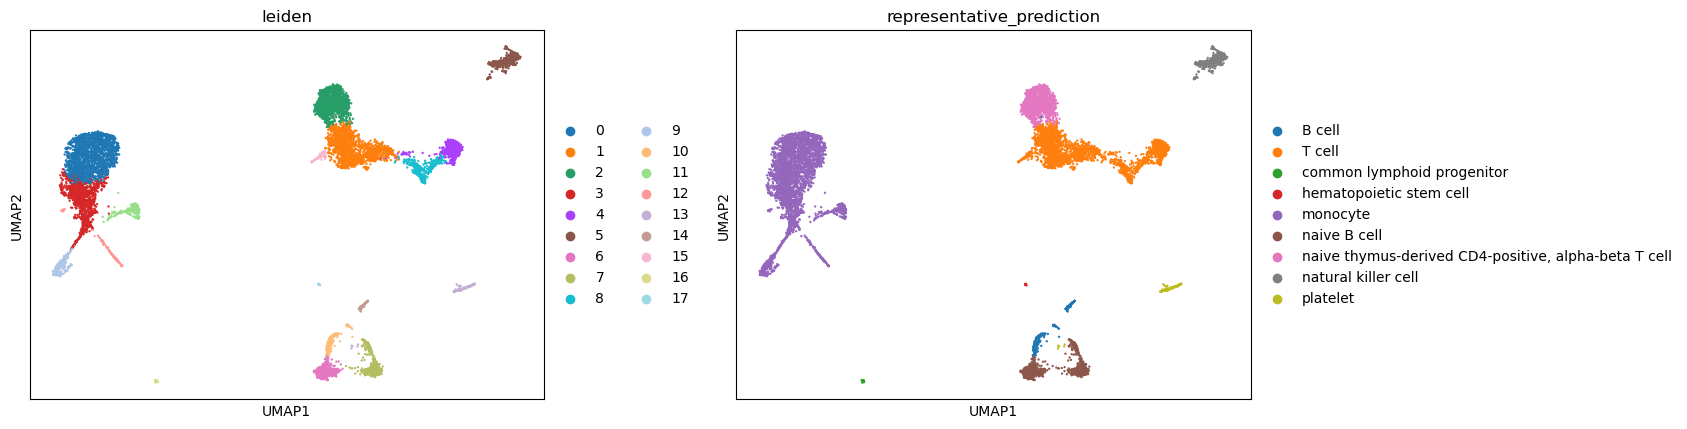

In [22]:
sc.pl.umap(adata_sci, color =['leiden', 'representative_prediction'], wspace = 0.25)

##### Option 2: Constrained annotation
Here, cells are classified using pre-defined possible celltypes. By classifying against the full reference, we may get redundant cell types. So, we will subset the reference to just the possible celltypes we believe are in our data. This will reduce noise in cell type annotation.

Note: subsetting can slow classification speeds as the kNN is optimized for the full reference.

In [23]:
# if we expect these celltypes to be present in the dataset, we can safelist them
target_celltypes = [
    "CD4-positive, alpha-beta T cell",
    "CD8-positive, alpha-beta T cell",
    "regulatory T cell",
    "B cell",
    "plasma cell",
    "natural killer cell",
    "classical monocyte",
    "non-classical monocyte",
    "conventional dendritic cell",
    "plasmacytoid dendritic cell"
    "platelet"
]


ca.safelist_celltypes(target_celltypes)

In [24]:
adata_sci = ca.annotate_dataset(adata_sci)

Get nearest neighbors finished in: 0.09777263402938843 min


100%|███████████████████████████████████| 10911/10911 [00:02<00:00, 4326.77it/s]


Notice that we used `ca.get_predictions_knn` function for unconstrained annotation, while we are using `ca.annotate_dataset` for constrained annotation. Both functions do the same thing, the main difference being that `ca.get_predictions_knn` gives additional outputs like distances that can be used for other purposes. But for getting the annotation only, either function is OK.

##### Visualization

We can visualize the predictions on our UMAP:

In [25]:
adata_sci

AnnData object with n_obs × n_vars = 10911 × 28231
    obs: 'leiden', 'predictions_unconstrained', 'representative_prediction', 'celltype_hint', 'min_dist', 'celltype_hits', 'celltype_hits_weighted', 'celltype_hint_stat', 'celltype_hint_weighted_stat'
    uns: 'orig_genes', 'predictions_unconstrained_colors', 'leiden_colors', 'representative_prediction_colors'
    obsm: 'X_umap', 'X_scimilarity'
    layers: 'counts'

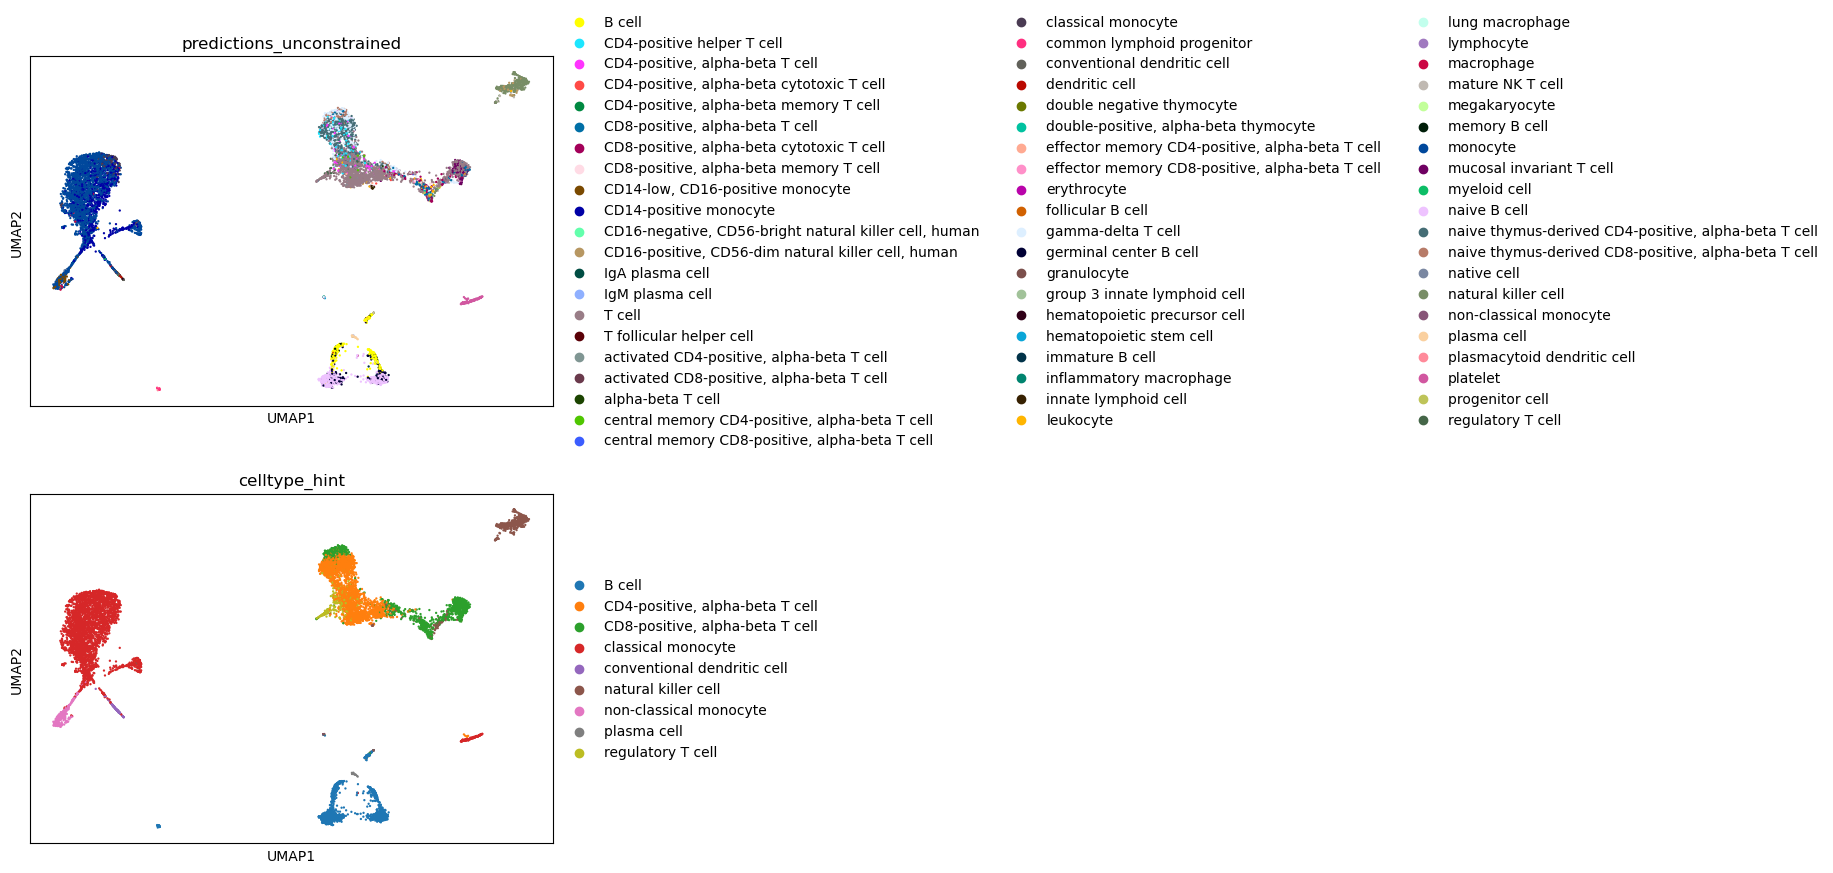

In [26]:
sc.pl.umap(adata_sci, color=["predictions_unconstrained", "celltype_hint"], ncols = 1)

##### Composition per cluster

In [27]:
df_cluster = adata_sci.obs[['leiden', 'celltype_hint']]
df_cluster.head()

,leiden,celltype_hint
AAACCCAAGCGCCCAT-1,1,"CD4-positive, alpha-beta T cell"
AAACCCAAGGTTCCGC-1,12,conventional dendritic cell
AAACCCACAGAGTTGG-1,0,classical monocyte
AAACCCACAGGTATGG-1,5,natural killer cell
AAACCCACATAGTCAC-1,7,B cell


In [28]:
celltype_counts_hint = df_cluster.groupby("leiden")["celltype_hint"].value_counts().unstack(fill_value=0)

/var/folders/x1/3bxg2yyn42x6m5tcv9l5k511m4dgnw/T/ipykernel_86641/1384313800.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celltype_counts_hint = df_cluster.groupby("leiden")["celltype_hint"].value_counts().unstack(fill_value=0)


In [29]:
celltype_counts_hint

celltype_hint,B cell,"CD4-positive, alpha-beta T cell","CD8-positive, alpha-beta T cell",classical monocyte,conventional dendritic cell,natural killer cell,non-classical monocyte,plasma cell,regulatory T cell
leiden,,,,,,,,,
0,0,0,0,1974,0,0,0,0,0
1,0,1487,149,0,0,26,0,0,160
2,0,1129,311,0,0,0,0,1,35
3,0,0,0,1108,0,0,40,0,0
4,0,6,639,0,0,15,0,0,0
5,0,0,2,0,0,621,0,0,0
6,602,0,0,0,0,0,0,1,0
7,581,0,0,0,0,0,0,0,0
8,0,0,364,0,0,64,0,0,0


##### Most occuring celltype per cluster

In [30]:
representatives_hint = celltype_counts_hint.idxmax(axis = 1)

In [31]:
representatives_hint.to_dict()

{'0': 'classical monocyte',
 '1': 'CD4-positive, alpha-beta T cell',
 '2': 'CD4-positive, alpha-beta T cell',
 '3': 'classical monocyte',
 '4': 'CD8-positive, alpha-beta T cell',
 '5': 'natural killer cell',
 '6': 'B cell',
 '7': 'B cell',
 '8': 'CD8-positive, alpha-beta T cell',
 '9': 'non-classical monocyte',
 '10': 'B cell',
 '11': 'classical monocyte',
 '12': 'conventional dendritic cell',
 '13': 'classical monocyte',
 '14': 'B cell',
 '15': 'regulatory T cell',
 '16': 'B cell',
 '17': 'B cell'}

In [32]:
adata_sci.obs['representative_prediction_constrained'] = adata_sci.obs['leiden'].map(representatives_hint.to_dict())

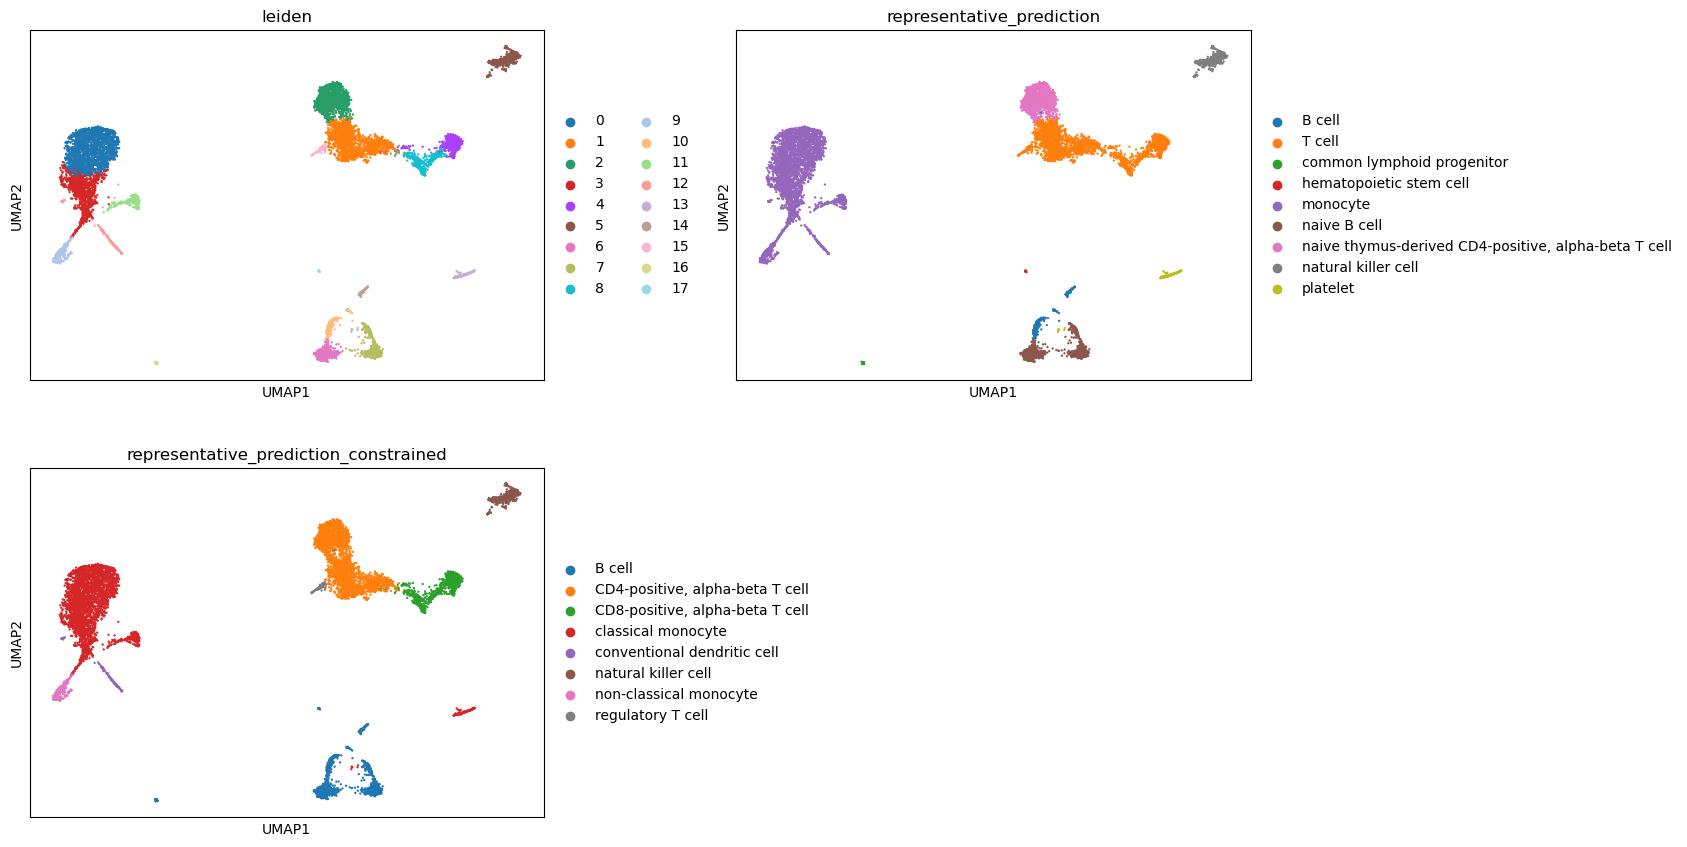

In [33]:
sc.pl.umap(adata_sci, color =['leiden', 'representative_prediction', 'representative_prediction_constrained'], ncols = 2, wspace = 0.25)

### Transfer results to adata_clean

In [47]:
adata_sci

AnnData object with n_obs × n_vars = 10911 × 28231
    obs: 'leiden', 'predictions_unconstrained', 'representative_prediction', 'celltype_hint', 'min_dist', 'celltype_hits', 'celltype_hits_weighted', 'celltype_hint_stat', 'celltype_hint_weighted_stat', 'representative_prediction_constrained'
    uns: 'orig_genes', 'predictions_unconstrained_colors', 'leiden_colors', 'representative_prediction_colors', 'celltype_hint_colors', 'representative_prediction_constrained_colors'
    obsm: 'X_umap', 'X_scimilarity'
    layers: 'counts'

In [49]:
columns_to_copy = ['predictions_unconstrained', 'representative_prediction', 'celltype_hint', 'representative_prediction_constrained']
adata_clean.obs[columns_to_copy] = adata_sci.obs[columns_to_copy].loc[adata_clean.obs.index]

### Visualize all results so far

In [50]:
adata_clean

AnnData object with n_obs × n_vars = 10911 × 13613
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'celltype', 'predictions_unconstrained', 'representative_prediction', 'celltype_hint', 'representative_prediction_constrained'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mt', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'celltype_colors', 'cluster_vs_rest', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_0.8', 'leiden_0.9', 'leiden_1', 'leiden_1.1', 'leiden_1.2', 'leiden_colors', 'log1p', 'neigh

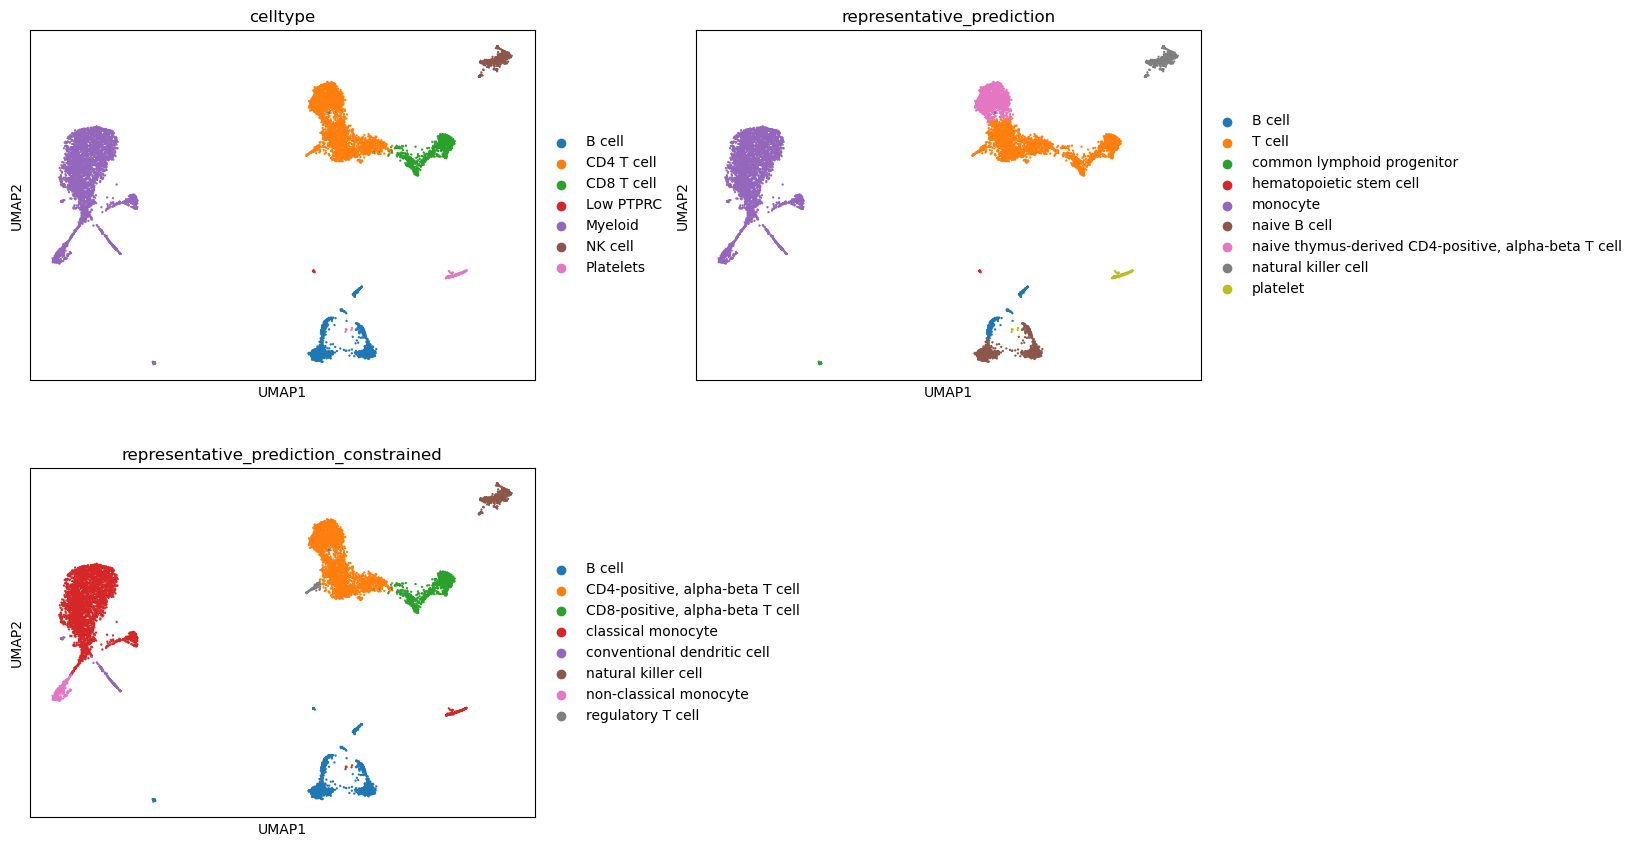

In [55]:
sc.pl.umap(adata_clean, color = ['celltype', 'representative_prediction', 'representative_prediction_constrained'], ncols = 2, wspace = 0.2)

## Exercise task for the hands on session

Scimilarity also allows us to perform cell annotation using Highly Variable Genes (HVG) only. We have discussed that identifying highly variable genes in the data can help improve signal in the data. Please repeat the above procedure to use Scimilarity to automatically annotate your clusters but this time use highly variable genes only in your data. Hint: Create a new adata_subset that only has highly variable genes. 

Note: As we discussed, please ensure that the genes you know are important for your study are included as HVGs. If not, you should feel free to manually include them.

In [34]:
# Step 1: Prepare for Scimilarity, Subset the dataset to only include highly variable genes


In [3]:
# Step 2: Check how many overlaps we have with HVG:


In [4]:
# Step 3: Align dataset and normalize counts

# Step 4: Compute embeddings


In [5]:
# Step 5: Unconstrained prediction



In [6]:
# Step 6: Constrained annotation


### Visualization

Please visualize the predictions on our UMAP:

### Annotation QC

Cell annotation also computes QC metrics for our annotations. One of which, min_dist, represents the minimum distance between a cell in the query dataset and all cells in the training set. The greater min_dist, (i.e., the further away from what the model has seen before) the less confidence we have in the model's prediction.

In [45]:
adata_sci

AnnData object with n_obs × n_vars = 10911 × 28231
    obs: 'leiden', 'predictions_unconstrained', 'representative_prediction', 'celltype_hint', 'min_dist', 'celltype_hits', 'celltype_hits_weighted', 'celltype_hint_stat', 'celltype_hint_weighted_stat', 'representative_prediction_constrained'
    uns: 'orig_genes', 'predictions_unconstrained_colors', 'leiden_colors', 'representative_prediction_colors', 'celltype_hint_colors', 'representative_prediction_constrained_colors'
    obsm: 'X_umap', 'X_scimilarity'
    layers: 'counts'

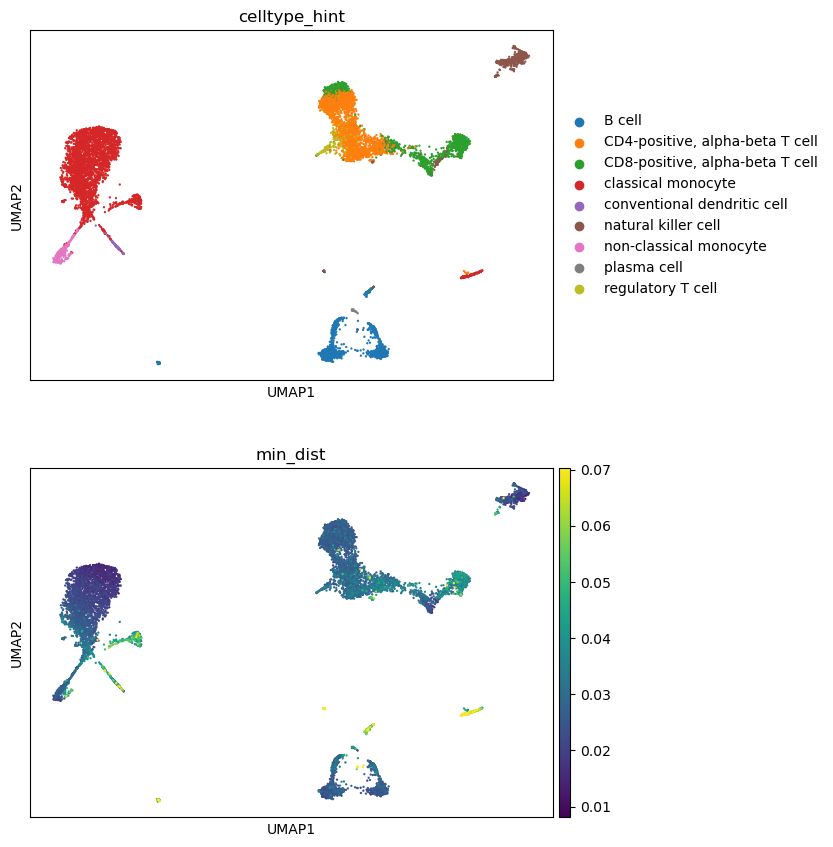

In [46]:
# The greater `min_dist`, (i.e., the further away from what the model has seen before) 
# the less confidence we have in the model's prediction.
sc.pl.umap(adata_sci, color=['celltype_hint', "min_dist"], vmax='p99', ncols = 1)

Scimilarity has other extensive tutorials available here: https://genentech.github.io/scimilarity/tutorials.html

# Save for next time

In [ ]:
os.makedirs("./data", exist_ok=True)

In [ ]:
adata_clean.write_h5ad('./data/data_from_session-3.h5ad')